# <font color='blue'>Portfólio - Preço de Casa - Regressão Linear Múltipla</font>

# Regressão Linear do zero

In [129]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt

In [102]:
base = pd.read_csv('dataframe.csv')

In [103]:
base.head()

,Unnamed: 0,Index,Data,Preco,Quartos,Banheiros,area_util,lote,andares,beira_mar,...,nota,above,basement,ano_construcao,reforma,cep,latitude,longitude,living,lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [104]:
X = base.iloc[:, 4:20].values
y = base.iloc[:, 3].values

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, 
                                                        test_size = 0.30, 
                                                        random_state = 0)

# Prevendo o Preço das Casas

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
regressor = LinearRegression()

In [109]:
regressor.fit(X_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
score = regressor.score(X_treino,y_treino)

In [111]:
score

0.7029888085955012

### O método fit() do módulo LinearRegression aprende os parâmetros do seguinte modelo de regressão linear simples:

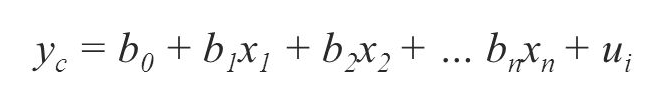

In [112]:
from IPython.display import Image
Image('linear.png')

### Y - variável dependente (preço das casas)
### X - variáveis independentes ou explanatórias (todas as outras caracterísricas da casa)

In [113]:
previssoes = regressor.predict(X_teste)
previssoes

array([ 383751.77768694, 1514216.17517441,  546921.96179111, ...,
        314968.57623291,  219405.55573559,  148128.83467048])

In [114]:
y_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [115]:
data = {'Teste': y_teste, 
        'Previssoes': previssoes}
frame = DataFrame(data)
frame.head()

,Teste,Previssoes
0,297000.0,3.837518e+05
1,1578000.0,1.514216e+06
2,562100.0,5.469220e+05
3,631500.0,5.799646e+05
4,780000.0,9.850146e+05


In [116]:
frame['Resultado'] = abs(y_teste - previssoes)
frame.head()

,Teste,Previssoes,Resultado
0,297000.0,3.837518e+05,86751.777687
1,1578000.0,1.514216e+06,63783.824826
2,562100.0,5.469220e+05,15178.038209
3,631500.0,5.799646e+05,51535.421574
4,780000.0,9.850146e+05,205014.644438


In [117]:
frame.describe()

,Teste,Previssoes,Resultado
count,6.484000e+03,6.484000e+03,6.484000e+03
mean,5.388782e+05,5.400728e+05,1.238884e+05
std,3.705579e+05,3.005764e+05,1.655797e+05
min,8.200000e+04,-2.600495e+05,2.812872e+01
25%,3.200000e+05,3.380057e+05,3.892692e+04
50%,4.500000e+05,4.889878e+05,8.644133e+04
75%,6.450000e+05,6.858845e+05,1.555183e+05
max,7.062500e+06,3.185176e+06,4.087198e+06


In [118]:
from sklearn.metrics import mean_absolute_error

In [119]:
previssoes = regressor.predict(X_teste)

In [120]:
mae = mean_absolute_error(y_teste, previssoes)

In [121]:
print('Coeficiente: \n', regressor.coef_)

# MSE (mean square error)
print("MSE: %.2f" % mae)

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.6f' % regressor.score(X, y))

Coeficiente: 
 [-3.08423090e+04  3.66540816e+04  1.12179159e+02  8.00604120e-03
  9.60355724e+03  5.85441638e+05  5.60621840e+04  2.54795004e+04
  1.01092121e+05  6.96565321e+01  4.25226267e+01 -2.60724691e+03
  1.40070753e+01 -5.53557431e+02  6.11778251e+05 -1.95564688e+05]
MSE: 123888.44
Score de variação: 0.698575


In [122]:
regressor.score(X_teste, y_teste)

0.6885414149062417

In [123]:
regressor.intercept_

5736222.703409516

In [124]:
len(regressor.coef_)

16

## Vizualização dos Dados

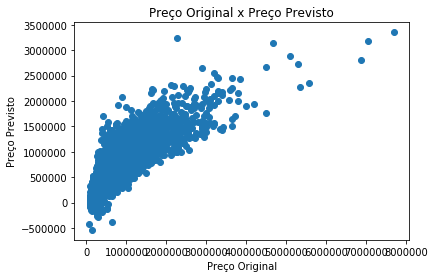

In [133]:
plt.scatter(base.Preco, regressor.predict(X))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()